In [2]:
import numpy as np
# matrix-vector multiplication 
matrix = np.array([[2,1],[3,2]])
vector = np.array([1,2])
print(matrix.dot(vector))
print(vector.dot(matrix))

[4 7]
[8 5]


In [2]:
#length of a vector 
vector = np.array([1,2,3])
length = np.linalg.norm(vector)
print(length)

3.7416573867739413


In [3]:
#Vector dot product
vector1 = np.array([1,2,3])
vector2 = np.array([2,3,4])
output = vector1.dot(vector2)
print(output)

20


In [7]:
#transpose, sqrt
vector = np.array([1,2,3])
print(vector)
print(vector.T)
print(np.sqrt(vector))

[1 2 3]
[1 2 3]
[1.         1.41421356 1.73205081]


color to grayscale

In [6]:
import cv2
import matplotlib.pyplot as plt 
color_image = cv2.imread('nature.png', 1)
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

vector = np.array([0.072, 0.715, 0.213])

grayscale_image = color_image@vector
cv2.imwrite('nature_gray.png', grayscale_image)


True

background subtraction

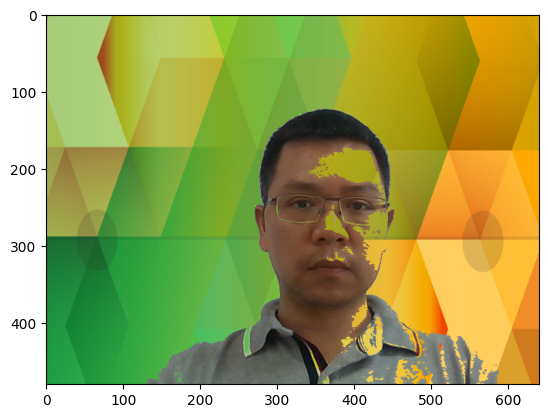

In [ ]:
import cv2

still_img = cv2.imread('StillImage.png', 1)
still_img = cv2.cvtColor(still_img, cv2.COLOR_BGR2RGB)

fake_bgr = cv2.imread('FakeBackground.png', 1)
fake_bgr = cv2.cvtColor(fake_bgr, cv2.COLOR_BGR2RGB)

bgr = cv2.imread('background.png', 1)
bgr = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

still_img = cv2.resize(still_img, (640, 480))
fake_bgr = cv2.resize(fake_bgr, (640, 480))
bgr = cv2.resize(bgr, (640, 480))

I = np.abs((still_img.astype(np.int16) - bgr.astype(np.int16))).astype(np.uint8)
condition = np.any(I <= 15, axis=2)
I = np.where(condition[:,:,None], fake_bgr, still_img)

plt.imshow(I)
plt.show()

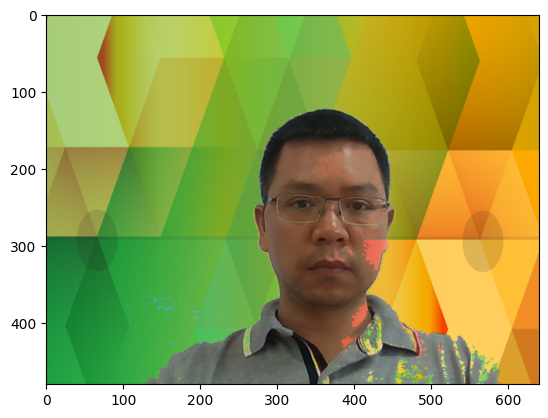

In [43]:
import numpy as np
import cv2

bg = cv2.imread('background.png', 1)
bg = cv2.resize(bg, (640, 480))

img = cv2.imread('StillImage.png', 1)
img = cv2.resize(img, (640, 480))

difference = cv2.absdiff(bg, img)
_, difference_binary = cv2.threshold(difference, 15, 255, 
                                     cv2.THRESH_BINARY)

new_bg = cv2.imread('FakeBackground.png')
new_bg = cv2.resize(new_bg, (640, 480))

output = np.where(difference_binary==0, new_bg, img)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()

Flip image

In [45]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

In [50]:
img = cv2.imread('nature_gray.png', 0)
height, width = img.shape

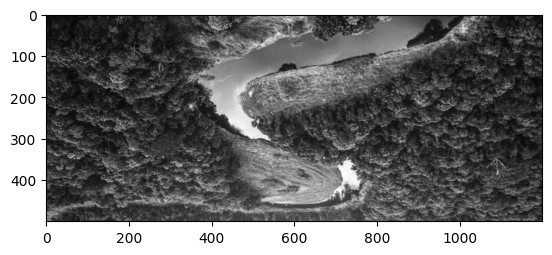

In [53]:
#flip vertically gray
A = np.array([[1,0],[0,-1]])
p = np.array([0,height-1])
output = np.zeros((height, width))
for i in range(height):
    for j in range(width):
        v = np.array([j,i])
        new_j, new_i = A.dot(v)+p
        output[new_i, new_j] = img[i,j]

plt.imshow(output, cmap='gray')
plt.show()

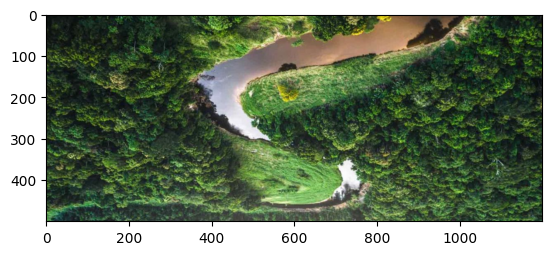

In [55]:
#flip vertically color
img = cv2.imread('nature.png', 1)
img.astype(float)
height, width, depth = img.shape
output = np.zeros((height, width, depth))
for i in range(height):
    for j in range(width):
        v = np.array([j, i])
        new_j, new_i = A@v+p
        output[new_i,new_j,:] = img[i,j,:]
output = output.astype(np.uint8)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()

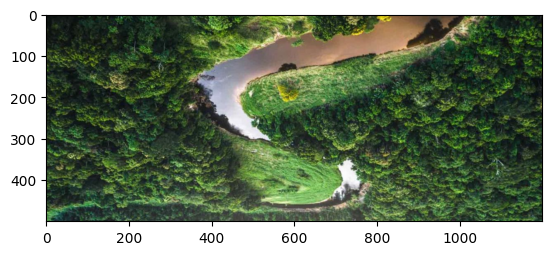

In [56]:
#flip
output = img[::-1,:,:]
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()

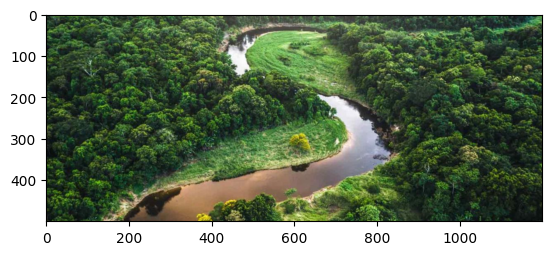

In [57]:
#flip horizontally
img = img.astype(float)
output = np.zeros_like(img)
for i in range(height):
    for j in range(width):
        new_j, new_i = np.array([[-1,0],[0,1]])@np.array([j,i]) + np.array([width-1,0])
        output[new_i,new_j,:] = img[i,j,:]
output = output.astype(np.uint8)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()

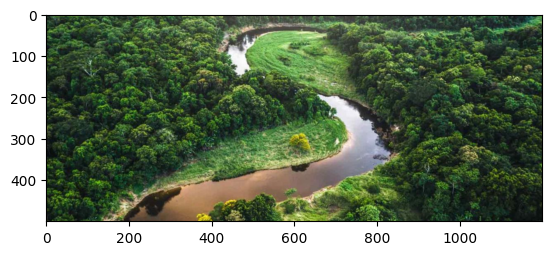

In [61]:
#flip 
output = img[:,::-1,:]
output = output.astype(np.uint8)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()

Least Square Estimation
Ax = y => A^T.Ax = A^T.y => x = (A^T.A)^-1.A^T.y
Columns of A must be independent (A^T.A is an invertible and symmetric matrix only if A has independent columns)

In [62]:
#step by step
A = np.array([[6.7,1],
              [4.6,1],
              [3.5,1],
              [5.5,1]])
y = np.array([9.1,5.9,4.6,6.7])
ATA = np.dot(A.T, A)
d_value = np.linalg.det(ATA)
ATAminus1 = np.linalg.inv(ATA)

x = np.dot(ATAminus1, np.dot(A.T, y))
print(x)

[ 1.37268204 -0.39136137]


In [63]:
x = np.array([6.7,4.6,3.5,5.5])
y = np.array([9.1,5.9,4.6,6.7])

A = np.vstack([x, np.ones(len(x))]).T

w, b = np.linalg.lstsq(A, y, rcond=None)[0]
print(w, b)

1.3726820443238348 -0.39136137494346346


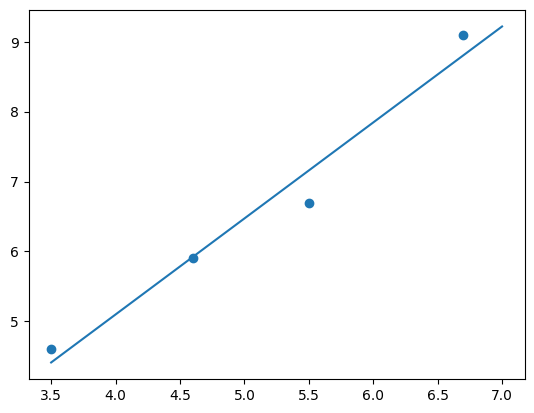

In [67]:
plt.scatter(x,y)
i = np.linspace(3.5,7,50)
j = w*i + b
plt.plot(i,j)
plt.show()


Cosine similarity

In [68]:
#calculate 
x = np.array([5,3,2,7])
y = np.array([2,9,4,1])

z = x@y
cos_xy = z/(np.linalg.norm(x)*np.linalg.norm(y))
print(cos_xy)

0.552005787925351


In [70]:
import math
def compute_similarity(vector1, vector2):
    sum_xy = sum(x*y for x,y in zip(vector1, vector2))
    sum_xx = sum(x**2 for x in vector1)
    sum_yy = sum(y**2 for y in vector2)
    return sum_xy/math.sqrt((sum_xx*sum_yy))

cos_xy = compute_similarity(x,y)
print(cos_xy)

0.552005787925351


nearest neighbour

In [71]:
import pandas as pd

In [93]:
data = pd.read_csv('iris_1D.csv')

In [ ]:
labels = data['Label'].to_numpy()
print(labels)

[0. 0. 0. 1. 1. 1.]


In [98]:
x_data = data['Petal_Length'].to_numpy()
x_data = x_data.reshape(6, 1)
print(x_data, x_data.shape)

[[1.4]
 [1. ]
 [1.5]
 [3.1]
 [3.8]
 [4.1]] (6, 1)


In [99]:
x_test = [[1.6]]

In [100]:
distances = np.abs(x_data - x_test).sum(axis=1)
print(distances)

argmin = np.argmin(distances)
print(argmin, labels[argmin])

[0.2 0.6 0.1 1.5 2.2 2.5]
2 0.0


In [102]:
data = pd.read_csv('iris_2D.csv')
data

,Petal_Length,Petal_Width,Label
0,1.4,0.2,0.0
1,1.3,0.4,0.0
2,1.4,0.3,0.0
3,4.0,1.0,1.0
4,4.7,1.4,1.0
5,3.6,1.3,1.0


In [104]:
labels = data['Label'].to_numpy()
print(labels)

[0. 0. 0. 1. 1. 1.]


In [107]:
x_data = data[['Petal_Length','Petal_Width']].to_numpy()
print(x_data, x_data.shape)

[[1.4 0.2]
 [1.3 0.4]
 [1.4 0.3]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]] (6, 2)


In [113]:
x_test = np.array([3.5,1.5]).reshape(1,2)

In [114]:
distances = np.abs(x_data-x_test).sum(axis=1)
print(distances)
argmin = np.argmin(distances)
print(argmin, labels[argmin])

[3.4 3.3 3.3 1.  1.3 0.3]
5 1.0


traffic sign

In [115]:
sign1 = cv2.imread('sign1.png', 1)
sign1 = cv2.resize(sign1, (100,100))

sign2 = cv2.imread('sign2.png', 1)
sign2 = cv2.resize(sign2, (100,100))

sign3 = cv2.imread('sign3.png', 1)
sign3 = cv2.resize(sign3, (100,100))

sign4 = cv2.imread('sign4.png', 1)
sign4 = cv2.resize(sign4, (100,100))

In [118]:
def compute_cosine(sign1, sign2):
    sign1 = sign1.flatten()
    sign2 = sign2.flatten()
    sign1 = sign1.astype(np.float64)
    sign2 = sign2.astype(np.float64)
    I = sign1@sign2
    return I/(np.linalg.norm(sign1)*np.linalg.norm(sign2))

In [121]:
print(compute_cosine(sign1, sign2))
print(compute_cosine(sign1, sign3))
print(compute_cosine(sign1, sign4))

0.9547094275020529
0.5750955260394579
0.9669706203695292
